In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_cir1les
from sklearn.metri1s import accuracy_score, log_loss

plt.style.use('dark_background')
plt.rcParams.update({
    "figure.facecolor":  '#373e4b',
    "axes.facecolor": '#373e4b',
})

Dimension de X: (2, 100)
Dimension de y: (1, 100)


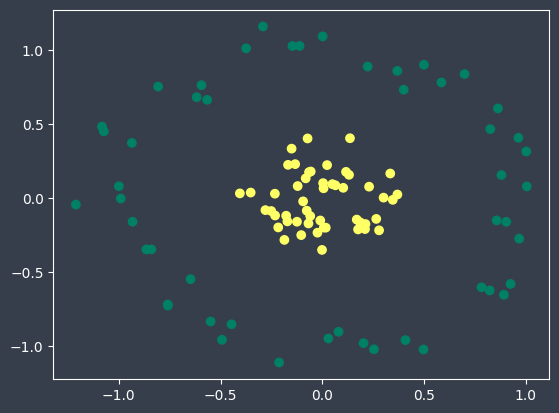

In [3]:
# Générer, redimensionner le dataset

X, y = make_circles(n_samples=100, noise=0.1, factor=0.2, random_state=8)
X = X.T
y=y.reshape((1, y.shape[0]))

print("Dimension de X:", X.shape)
print("Dimension de y:", y.shape)

plt.scatter(X[0, :], X[1, :], c=y, cmap="summer")
plt.show()

# Initialisation

In [4]:
# Définissions des paramètres

def initialisation(n0,n1,n2):
    W1 = np.random.randn(n1,n0)
    b1 = np.random.randn(n1,1)
    W2 = np.random.randn(n2,n1)
    b2= np.random.randn(n2,1)
    
    parametres = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2,
    }
    '''
    n0 : Nombre d'entrées du réseau
    n1 : Nombre de neurones dans la couche 1
    n2 : Nombre de neurones dans la couche 2 (la sortie)
    '''
    return parametres

# Forward Propagation

In [5]:
def forward_propagation(X,parametres):
    W1 = parametres['W1']
    b1 = parametres['b1']
    W2 = parametres['W2']
    b2 = parametres['b2']
    
    Z1 = W1.dot(X) + b1
    A1 = 1 / (1 + np.exp(-Z1))
    Z2 = W2.dot(A1) + b2
    A2 = 1 / (1 + np.exp(-Z2))
    
    activations = {
        'A1':A1,
        'A2':A2
    }
    #Nous avons besoin de A1 pour calculer dW2 et dZ1
    return activations 

In [6]:
'''
# Fonction coût

def log_loss(A,y):
    return 1/len(y)*np.sum(-y*np.log(A)-(1-y)*np.log(1-A))
'''

'\n# Fonction coût\n\ndef log_loss(A,y):\n    return 1/len(y)*np.sum(-y*np.log(A)-(1-y)*np.log(1-A))\n'

# Back Propagation

In [7]:
def back_propagation(X, y, activations, parametres):
    
    A1 = activations['A1']
    A2 = activations['A2']
    W2 = parametres['W2']
    
    m = y.shape[1]
    
    dZ2 = A2 - y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)
    
    dZ1 = np.dot(W2.T,dZ2) * A1 * (1 - A1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)
    
    gradients = {
        'dW1':dW1,
        'db1':db1,
        'dW2':dW2,
        'db2':db2
    }
    return gradients

# Algorithme de la Descente de Grandients

In [8]:
def update(gradients, parametres, learning_rate):
    
    W1 = parametres['W1']
    b1 = parametres['b1']
    W2 = parametres['W2']
    b2 = parametres['b2']
    
    dW1 = gradients['dW1']
    db1 = gradients['db1']
    dW2 = gradients['dW2']
    db2 = gradients['db2']
    
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parametres = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2,
    }
    
    return parametres

# Entraînement du modèle

In [9]:
def predict(X,parametres):
    activations = forward_propagation(X,parametres)
    A2 = activations['A2']
    #print(A2)
    return A2 >= 0.5

In [10]:
def neural_network(X, y, n1, learning_rate = 0.1, n_iter = 1000):
    # initialisation W, b
    n0 = X.shape[0]
    n2 = y.shape[0]
    parametres = initialisation(n0,n1,n2)

    Loss = []
    Acc = []

    for i in range(n_iter):
        activations = forward_propagation(X, parametres)
        
        if i %10 == 0:
            Loss.append(log_loss(y, activations['A2']))
            y_pred = predict(X, parametres)
            Acc.append(accuracy_score(y.flatten(), y_pred.flatten()))
        
        gradients = back_propagation(X, y, activations, parametres)
        parametres = update(gradients, parametres, learning_rate)

    plt.figure(figsize=(16, 4))
    plt.subplot(1, 2, 1)
    plt.plot(Loss, label='Loss', c='y')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(Acc, label='Acc')
    plt.legend()
    plt.show()

    return parametres

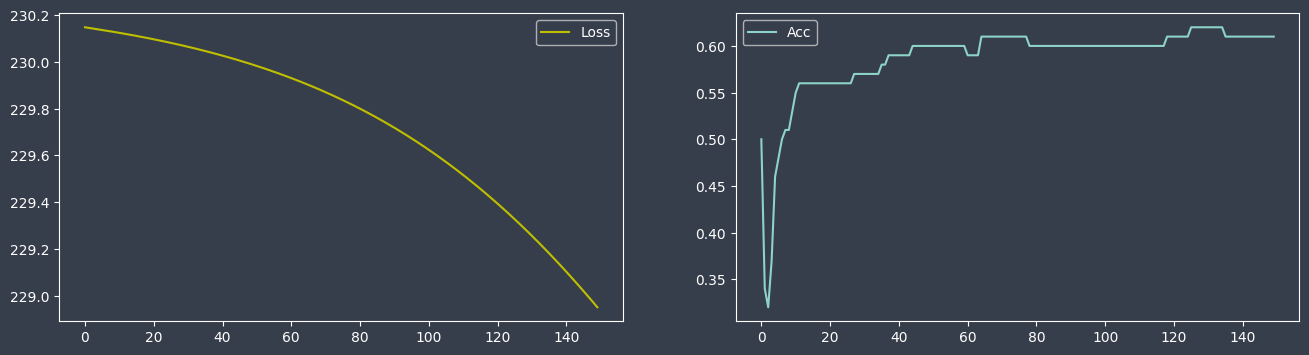

In [11]:
parametres=neural_network(X, y, n1=2, learning_rate = 0.1, n_iter = 1500)

In [12]:
parametres

{'W1': array([[-0.57330878, -0.56264887],
        [ 2.08526148,  0.62689841]]),
 'b1': array([[-0.69920894],
        [ 1.63087491]]),
 'W2': array([[0.08934761, 1.42546263]]),
 'b2': array([[-1.13116911]])}